# Introdução


https://www.kaggle.com/datasets/mirichoi0218/insurance

In [6]:
# Carregar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
# Carrega Dataset

df = pd.read_csv(r"C:\Users\luans\Workspace\Universidade_de_Daddos\insurance.csv")

# Mostrar Primeiras linhas do dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Estatísticas descritivas gerais

print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Resumo Geral
- A idade dos beneficiários varia de 18 a 64 anos, com uma média de aproximadamente 39 anos.
- O IMC médio está na faixa de sobrepeso (30.66), com uma variação considerável entre os beneficiários.
- O número médio de filhos é ligeiramente superior a 1, com a maioria dos beneficiários tendo entre 0 e 2 filhos.
- Os custos médicos variam amplamente, com uma média de 13270.42, mas alguns beneficiários incorreram em custos muito altos (até 63770.43).


Essas estatísticas fornecem uma visão inicial sobre a distribuição e a variação das variáveis no dataset, permitindo identificar possíveis áreas de interesse para análises mais detalhadas.







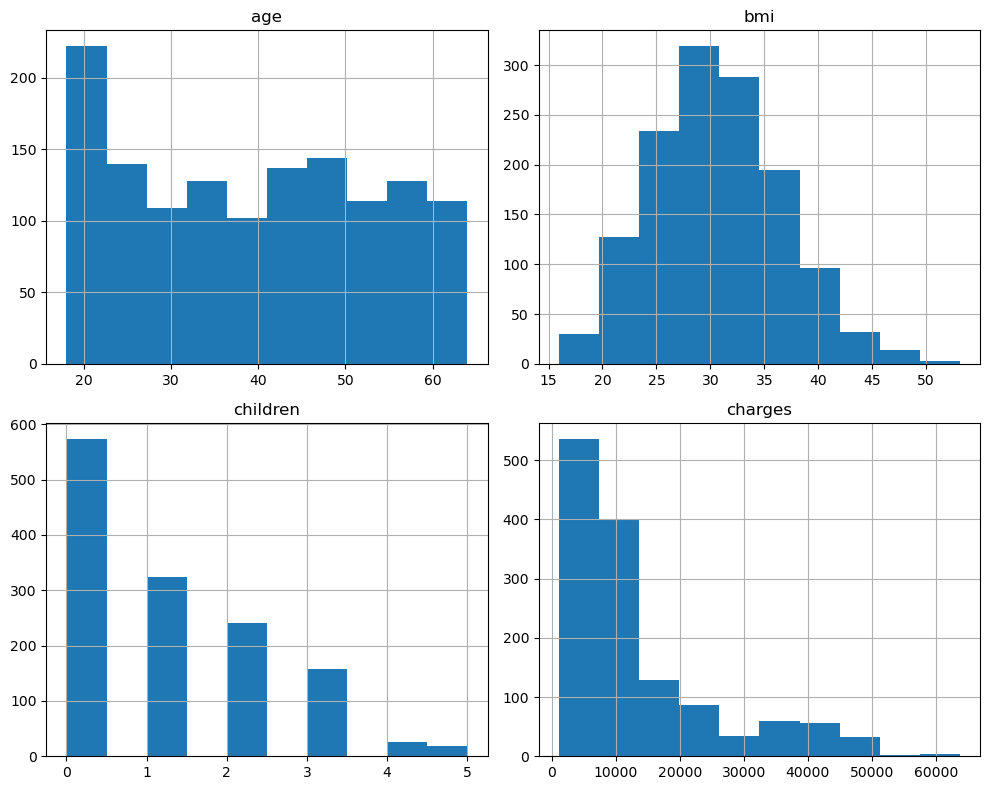

In [4]:
# Distribuição das variáveis numéricas

df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Considerações 

- A distribuição etária sugere que o dataset inclui beneficiários de várias faixas etárias, mas com uma concentração maior de jovens adultos.
- A distribuição do IMC mostra que a maioria dos beneficiários está na faixa de sobrepeso, o que pode ter implicações para políticas de saúde e custos médicos.
- O número de filhos por beneficiário tende a ser baixo, o que pode afetar as necessidades de cobertura de dependentes.
- A ampla variação nos custos médicos sugere a necessidade de investigar fatores que contribuem para os altos custos, como condições crônicas ou estilo de vida (ex: tabagismo).


Essas interpretações ajudam a entender melhor o perfil dos beneficiários e a distribuição das variáveis no seu dataset, fornecendo uma base para análises mais aprofundadas.

In [8]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print(df_encoded)

      age     bmi  children      charges  sex_male  smoker_yes  \
0      19  27.900         0  16884.92400     False        True   
1      18  33.770         1   1725.55230      True       False   
2      28  33.000         3   4449.46200      True       False   
3      33  22.705         0  21984.47061      True       False   
4      32  28.880         0   3866.85520      True       False   
...   ...     ...       ...          ...       ...         ...   
1333   50  30.970         3  10600.54830      True       False   
1334   18  31.920         0   2205.98080     False       False   
1335   18  36.850         0   1629.83350     False       False   
1336   21  25.800         0   2007.94500     False       False   
1337   61  29.070         0  29141.36030     False        True   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             False  
2                False  

In [5]:
# Contagem de frequências para variáveis categóricas

print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Considerações 

- Equilíbrio de Gênero: A distribuição equilibrada de gênero permite análises justas e imparciais entre homens e mulheres.
- Tabagismo: A menor proporção de fumantes pode influenciar positivamente os custos médicos médios, mas também proporciona uma oportunidade de investigar o impacto do tabagismo em saúde e custos de forma mais detalhada.
- Distribuição Regional: A representação quase igual das quatro regiões principais dos EUA permite comparações regionais robustas e identificação de quaisquer diferenças geográficas em saúde e custos.


Essas contagens iniciais oferecem uma visão geral importante do dataset, ajudando a identificar áreas potenciais para análise mais detalhada e permitindo ajustes necessários para garantir que as conclusões sejam válidas e representativas.

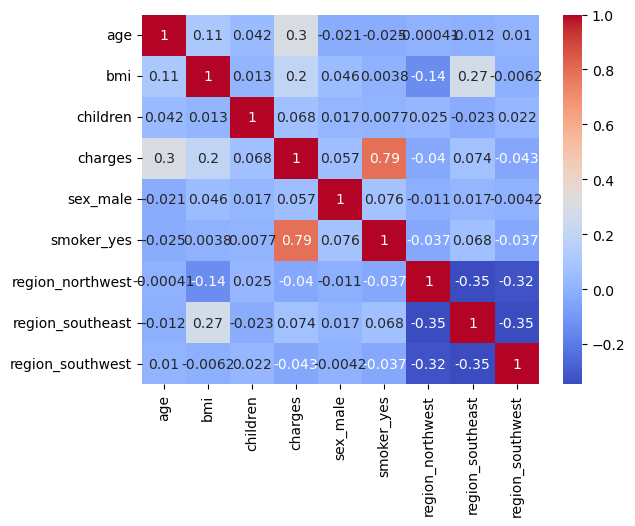

In [9]:
# Correlação entre variáveis numéricas

correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Conclusão

A análise da matriz de correlação indica que os fatores mais influentes nos custos médicos (charges) são o status de fumante (smoker_yes), seguido pelo IMC (bmi) e idade (age). As outras variáveis, como o número de filhos, gênero e região, têm menos influência nos custos médicos. Esta informação pode ser útil para direcionar esforços de políticas de saúde e modelagem preditiva.

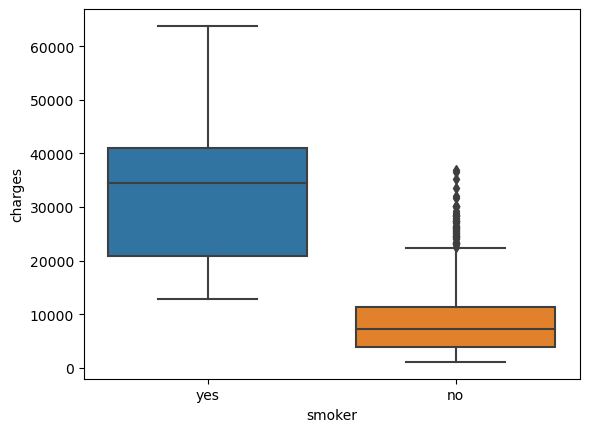

In [10]:
# Boxplot para comparar distribuição de custos médicos entre fumantes e não fumantes

sns.boxplot(x='smoker', y='charges', data=df)
plt.show()

Fumantes (yes):

- Mediana: A mediana dos custos médicos para fumantes é significativamente mais alta do que para não fumantes, em torno de 35.000.
- Quartis: A maioria dos fumantes tem custos médicos entre aproximadamente 20.000 e 45.000.
- Extremos (Whiskers): Os valores extremos vão de cerca de 0 a 65.000, indicando uma ampla variação nos custos médicos entre os fumantes.



Não Fumantes (no):

- Mediana: A mediana dos custos médicos para não fumantes é muito menor, em torno de 7.000.
- Quartis: A maioria dos não fumantes tem custos médicos entre aproximadamente 2.000 e 12.000.
- Extremos (Whiskers): Os valores extremos vão de cerca de 0 a 25.000, com vários outliers acima de 25.000, indicando que a maioria dos não fumantes tem custos relativamente baixos, mas há alguns casos com custos altos.


Observações Importantes


- Diferença Significativa nos Custos: O boxplot mostra uma clara diferença nos custos médicos entre fumantes e não fumantes, com os fumantes incorrendo em custos médios substancialmente mais altos.
- Variação nos Custos: Os fumantes não apenas têm custos médios mais altos, mas também uma maior variação nos custos, enquanto os não fumantes têm uma distribuição de custos mais concentrada.
- Outliers nos Não Fumantes: Há uma presença de outliers nos custos médicos dos não fumantes, mas mesmo esses outliers não se aproximam dos valores médios dos custos dos fumantes.



Conclusão

Este gráfico reforça a conclusão de que fumar está fortemente associado a maiores custos médicos, tanto em termos de valores medianos quanto em termos de variabilidade. Isso pode ser devido ao aumento do risco de doenças e complicações associadas ao tabagismo, que resultam em maiores despesas de saúde.

Essas informações são cruciais para seguradoras e formuladores de políticas de saúde, pois destacam a importância de programas de cessação do tabagismo como uma forma de reduzir os custos de saúde e melhorar a saúde pública.

In [14]:
# Tabelas de contingência e Teste Qui-Quadrado

contingency_table = pd.crosstab(df['smoker'], df['sex'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2}, p-value: {p}")

Chi-Squared: 7.39291081459996, p-value: 0.006548143503580696


Rejeição da Hipótese Nula:

O p-value (0.006548) é menor que o nível de significância comum (0.05), o que nos leva a rejeitar a hipótese nula de que smoker e sex são independentes.
Isso significa que há evidências estatísticas suficientes para sugerir que existe uma associação significativa entre ser fumante e o sexo dos indivíduos no dataset.


Implicação Prática:

Essa associação significa que a distribuição de fumantes e não fumantes não é a mesma entre os sexos. Ou seja, a proporção de fumantes pode ser diferente entre homens e mulheres.

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

# Suponha que o DataFrame df tenha as colunas 'sex' e 'smoker'
contingency_table = pd.crosstab(df['smoker'], df['sex'])

# Aplicação do teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Squared: {chi2}, p-value: {p}')
print(contingency_table)
print(expected)

Chi-Squared: 7.39291081459996, p-value: 0.006548143503580696
sex     female  male
smoker              
no         547   517
yes        115   159
[[526.43348281 537.56651719]
 [135.56651719 138.43348281]]


Fumantes (smoker = yes):

- Mais homens são fumantes (159) do que mulheres (115).
- Isso sugere que a probabilidade de ser fumante é maior entre os homens neste dataset.


Não Fumantes (smoker = no):

- O número de mulheres não fumantes (547) é maior do que o de homens não fumantes (517).
- Isso sugere que a probabilidade de não fumar é maior entre as mulheres neste dataset.

Conclusão Final

A análise indica uma associação significativa entre sexo e status de fumante. As seguradoras e profissionais de saúde podem usar essas informações para direcionar campanhas antitabagismo de forma mais eficaz, levando em conta a diferença entre homens e mulheres em termos de comportamento de fumar.

In [ ]:
# Aqui quero criar uma coluna categorizando os custos médicos em high medium e low, para poder fazer esse teste qui_Quadrado e ver se tem alguma relação


In [18]:
# Regressão Linear
import statsmodels.api as sm

X = df[['age', 'bmi', 'children']]
y = df['charges']
X = sm.add_constant(X) # adiciona o intercepto
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           8.80e-37
Time:                        15:05:55   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.0

In [ ]:
# Aqui vou editar a coluna smoker para conseguir realizar a regressão linear
